In [1]:
# Import dependencies. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and lognitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and lognitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the list of cities.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5efb6fe89b37682abebc20c98bd6c3


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | linfen
Processing Record 3 of Set 1 | high level
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | gonaives
Processing Record 10 of Set 1 | oranjemund
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | halifax
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | raga
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | makakilo city
Processing Record 25 of 

Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | santa isabel do rio negro
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | wajid
Processing Record 48 of Set 4 | ponta delgada
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | korem
Processing Record 5 of Set 5 | chahuites
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | bondo
Processing Record 9 of Set 5 | middle island
Processing Record 10 of Set 5 | vestmanna
Processing Record 11 of Set 5 | vostok
Processing Record 12 of Set 5 | sirjan
Processing Record 13 of Set 5 | yurimaguas
Processing Record 14 of Set 5 | cidreira
Processing Record 15 of Set 5 | sitka
Processing

Processing Record 32 of Set 8 | nadvoitsy
Processing Record 33 of Set 8 | road town
Processing Record 34 of Set 8 | ciudad bolivar
Processing Record 35 of Set 8 | kendari
Processing Record 36 of Set 8 | ruidoso
Processing Record 37 of Set 8 | pochutla
Processing Record 38 of Set 8 | nuuk
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | bethel
Processing Record 41 of Set 8 | beboto
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | nguiu
City not found. Skipping...
Processing Record 44 of Set 8 | san rafael del sur
Processing Record 45 of Set 8 | tateyama
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | amapa
Processing Record 48 of Set 8 | provideniya
Processing Record 49 of Set 8 | prince rupert
Processing Record 50 of Set 8 | devonport
Processing Record 1 of Set 9 | oriximina
Processing Record 2 of Set 9 | kaka
Processing Record 3 of Set 9 | ruatoria
City not found. Skipping...
Proces

Processing Record 22 of Set 12 | malinovskiy
Processing Record 23 of Set 12 | verkhnyaya khava
Processing Record 24 of Set 12 | santa cruz del sur
Processing Record 25 of Set 12 | hays
Processing Record 26 of Set 12 | mount gambier
Processing Record 27 of Set 12 | bembibre
Processing Record 28 of Set 12 | doctor juan leon mallorquin
Processing Record 29 of Set 12 | yanam
Processing Record 30 of Set 12 | gollere
City not found. Skipping...
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | faya
Processing Record 33 of Set 12 | jardim
Processing Record 34 of Set 12 | ocos
Processing Record 35 of Set 12 | bilma
Processing Record 36 of Set 12 | varkaus
Processing Record 37 of Set 12 | thinadhoo
Processing Record 38 of Set 12 | klyuchevskiy
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | nambucca heads
Processing Record 41 of Set 12 | lusambo
Processing Record 42 of Set 12 | bozdar
Processing Record 43 of Set 12 | atar
Processing Record 44 of Set 1

In [9]:
# Get how many cities are in our array of dictionaries
len(city_data)

589

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,-18.40,68,1,19.46,US,2020-12-22 17:12:47
1,Linfen,36.09,111.52,35.56,70,99,3.62,CN,2020-12-22 17:12:47
2,High Level,58.52,-117.14,-11.20,76,90,2.24,CA,2020-12-22 17:11:16
3,Punta Arenas,-53.15,-70.92,53.60,50,75,23.04,CL,2020-12-22 17:12:48
4,Bredasdorp,-34.53,20.04,71.60,73,94,11.41,ZA,2020-12-22 17:12:48
5,Coquimbo,-29.95,-71.34,59.00,77,90,8.05,CL,2020-12-22 17:12:48
6,Luderitz,-26.65,15.16,73.40,69,5,16.11,NA,2020-12-22 17:12:48
7,Kodiak,57.79,-152.41,42.80,81,75,13.29,US,2020-12-22 17:12:49
8,Gonaives,19.45,-72.68,84.88,55,0,3.85,HT,2020-12-22 17:12:49
9,Oranjemund,-28.55,16.43,66.38,83,32,10.49,NA,2020-12-22 17:12:49


In [11]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2020-12-22 17:12:47,71.29,-156.79,-18.40,68,1,19.46
1,Linfen,CN,2020-12-22 17:12:47,36.09,111.52,35.56,70,99,3.62
2,High Level,CA,2020-12-22 17:11:16,58.52,-117.14,-11.20,76,90,2.24
3,Punta Arenas,CL,2020-12-22 17:12:48,-53.15,-70.92,53.60,50,75,23.04
4,Bredasdorp,ZA,2020-12-22 17:12:48,-34.53,20.04,71.60,73,94,11.41
5,Coquimbo,CL,2020-12-22 17:12:48,-29.95,-71.34,59.00,77,90,8.05
6,Luderitz,NA,2020-12-22 17:12:48,-26.65,15.16,73.40,69,5,16.11
7,Kodiak,US,2020-12-22 17:12:49,57.79,-152.41,42.80,81,75,13.29
8,Gonaives,HT,2020-12-22 17:12:49,19.45,-72.68,84.88,55,0,3.85
9,Oranjemund,NA,2020-12-22 17:12:49,-28.55,16.43,66.38,83,32,10.49


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

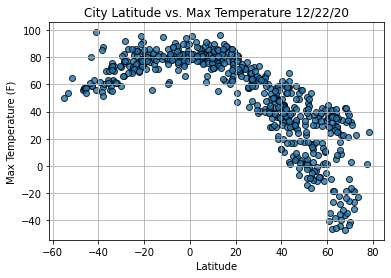

In [14]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

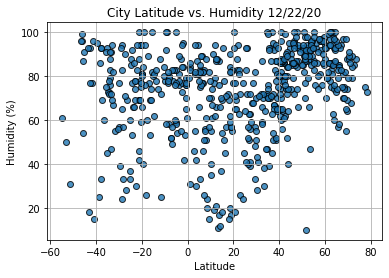

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

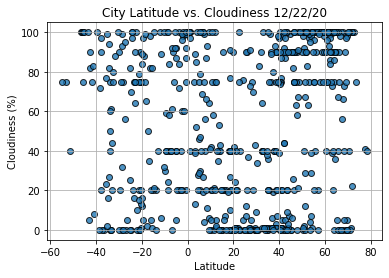

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

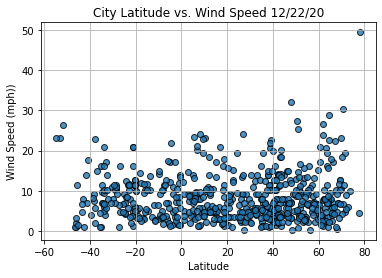

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print("R-squared: %f" % r_value**2)
    print("P-value: %f" % p_value)

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Yulara
Country                        AU
Date          2020-12-22 17:12:50
Lat                        -25.24
Lng                        130.99
Max Temp                     69.8
Humidity                       37
Cloudiness                     82
Wind Speed                   9.17
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

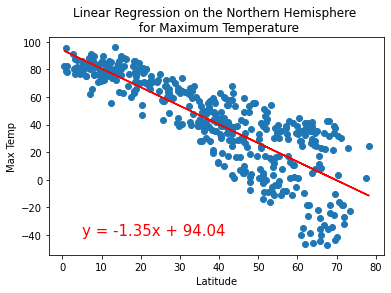

R-squared: 0.685859
P-value: 0.000000


In [21]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-40))

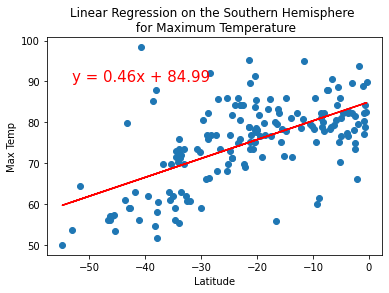

R-squared: 0.375023
P-value: 0.000000


In [29]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-53,90))

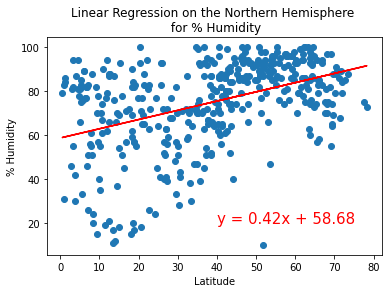

R-squared: 0.184695
P-value: 0.000000


In [30]:
# Linear regression on the Northern Hemisphere (% Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,20))

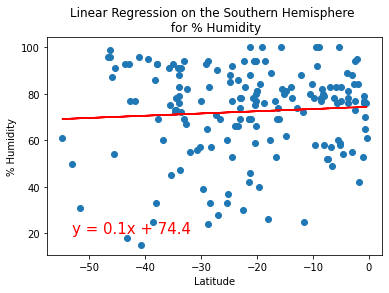

R-squared: 0.004467
P-value: 0.386503


In [24]:
# Linear regression on the Southern Hemisphere (% Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-53,20))

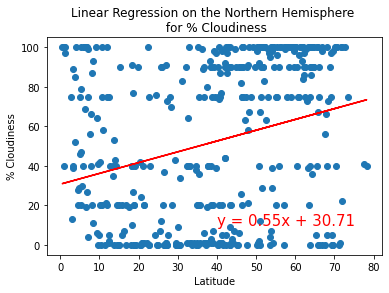

R-squared: 0.076654
P-value: 0.000000


In [25]:
# Linear regression on the Northern Hemisphere (% Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

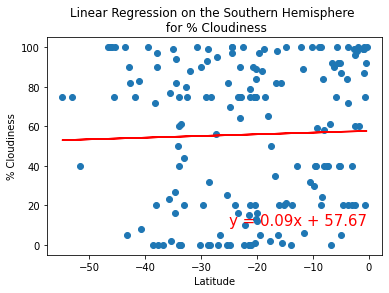

R-squared: 0.000969
P-value: 0.686946


In [26]:
# Linear regression on the Southern Hemisphere (% Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-25,10))

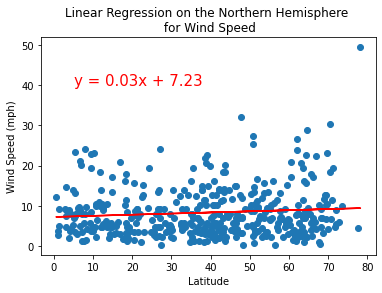

R-squared: 0.008321
P-value: 0.062102


In [32]:
# Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(5,40))

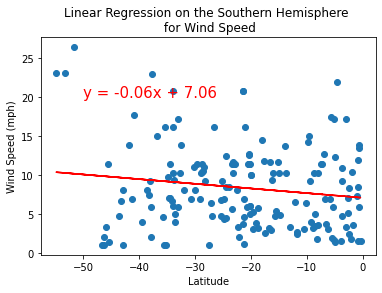

R-squared: 0.023115
P-value: 0.047795


In [33]:
# Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))